# XOR 게이트

## 1) 패키지 참조하기

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential  # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense       # 모델 객체에 학습을 위한 층을 쌓는다.
from tensorflow.keras.optimizers import RMSprop # 옵티마이저
from tensorflow.keras.losses import mse         # 활성화 함수
from pandas import DataFrame

## 2) 데이터 셋 준비하기
### 랜덤 시드값 고정

In [2]:
np.random.seed(777)

### 데이터 셋 구성

`XOR` 회로는 입력값이 동일한 경우 `False`, 입력값이 서로 다른 경우 `True`

In [3]:
train_x = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
train_y = np.array([[0], [1], [1], [0]])

## 3) 데이터 전처리

- 간단한 데이터 이므로 이 예제에서는 수행하지 않는다.

## 4) 탐색적 데이터 분석

In [4]:
label = train_y.flatten()
df = DataFrame(train_x, label, columns=['x1', 'x2'])
df.index.name = 'y'
df

,x1,x2
y,,
0,0,0
1,1,0
1,0,1
0,1,1


## 5) 데이터 셋 분할하기

- 훈련을 위한 데이터 자체가 워낙 양이 적기 때문에 여기서는 진행하지 않음.

## 6) 모델 개발

### 모델 정의


선형회귀라면 맨 처음 activation은 relu 다. 뭔지 모르니까.  
그 다음은 y가 0,1 분류 문제니까 시그모이드, 분류지만 2개 이상일때는 softmax다. 마지막에 들어가는 activation에 따라서 유형을 알 수 있다. 
근데 Dense(신경망 계층)는 누가 결정해? -> Dense가 많으면 오래 걸리고, 적으면 틀릴 수 있다. 
Dense는 2의 배수로 올라간다. ex) 2 8 16 32 64 ...


In [5]:
model = Sequential()
# 층이 1, 2인 경우 정확도 50%
# 층이 8인 경우 정확도 75%
# 층이 16, 32인 경우 정확도 100%
model.add(Dense(16, input_shape = (2, ), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = RMSprop(), loss = mse, metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 65 (260.00 Byte)
Trainable params: 65 (260.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습하기

In [6]:
hist = model.fit(train_x, train_y, epochs=500)

result_df = DataFrame(hist.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500
1/1 [==============================] - 0s 321ms/step - loss: 0.2642 - acc: 0.7500
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2623 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2610 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2600 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2591 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2583 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2576 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2569 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2563 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2557 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 10ms/step - loss: 0.25

,loss,acc
epochs,,
1,0.264217,0.75
2,0.262342,0.50
3,0.261025,0.50
4,0.259984,0.50
5,0.259106,0.50
...,...,...
496,0.120271,1.00
497,0.120118,1.00
498,0.119801,1.00


## 7) 학습 결과 평가

### 학습 결과 시각화

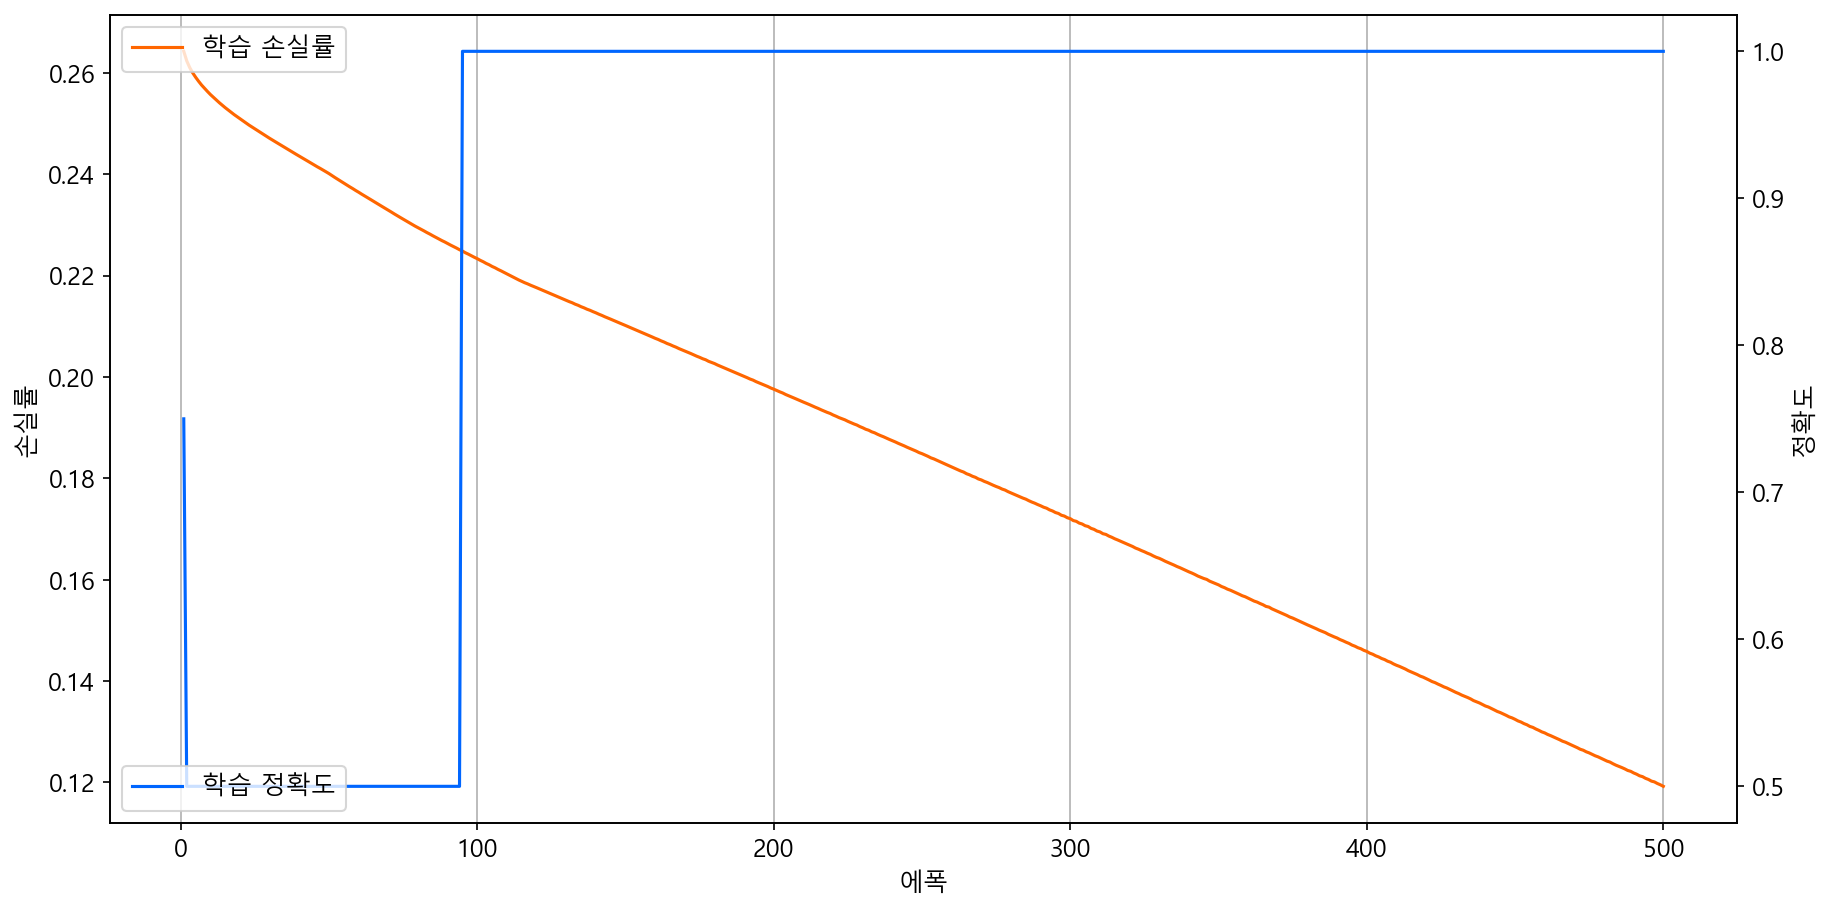

In [7]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12

fig, ax1 = plt.subplots(1, 1, figsize=(14, 7), dpi=150)
ax2 = ax1.twinx()

sns.lineplot(x=result_df.index, y='loss', data=result_df, color='#ff6600', label='학습 손실률', ax=ax1)
ax1.set_xlabel('에폭')
ax1.set_ylabel('손실률')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sns.lineplot(x=result_df.index, y='acc', data=result_df, color='#0066ff', label='학습 정확도', ax=ax2)
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.show()
plt.close()

### 모델 성능 평가

In [8]:
ev = model.evaluate(train_x, train_y)
print("손실률: %0.2f, 정확도: %0.2f" % (ev[0], ev[1]))

1/1 [==============================] - 0s 198ms/step - loss: 0.1191 - acc: 1.0000
손실률: 0.12, 정확도: 1.00


### 가중치, 편향 확인

In [9]:
weights = model.get_weights()
weights

[array([[-0.628671  , -0.31558686,  0.6579379 , -0.21924368,  0.33031458,
         -0.5636476 , -0.3947128 , -0.22169636,  0.8093475 ,  0.46204993,
          0.69675493,  0.32121363, -0.14264762,  0.43363786, -0.7516968 ,
          0.1195585 ],
        [ 0.6297462 , -0.27312276,  0.3185836 , -0.3877676 ,  0.33143115,
          0.5650127 , -0.33661073,  0.4410991 ,  0.01684543, -0.31410345,
          0.02992354,  0.32158607, -0.2326802 ,  0.56460017,  0.7508713 ,
         -0.4944948 ]], dtype=float32),
 array([ 2.9656419e-04,  0.0000000e+00,  2.5574325e-03,  0.0000000e+00,
        -3.3001214e-01,  5.9481722e-04,  0.0000000e+00,  3.7398100e-01,
         1.9248991e-03, -8.4319472e-02,  1.5390590e-03, -3.1913427e-01,
         0.0000000e+00, -4.3424565e-01, -9.2346594e-04, -1.1983797e-01],
       dtype=float32),
 array([[ 0.7546105 ],
        [ 0.27793485],
        [ 0.45900735],
        [-0.3427481 ],
        [-0.9222803 ],
        [ 0.80888534],
        [ 0.08515304],
        [-0.6255106 

In [10]:
# 2차원 배열 - 입력층과 은닉층을 연결하는 가중치
print(weights[0].shape)

# 1차원 배열 - 은닉층의 편향
print(weights[1].shape)

# 2차원 배열 - 은닉층과 출력층을 연결하는 가중치
print(weights[2].shape)

# 1차원 배열 - 출력층의 편향
print(weights[3].shape)

(2, 16)
(16,)
(16, 1)
(1,)


## 8) 학습 결과 적용

In [11]:
r = model.predict(train_x)
df['예측값'] = r.reshape(-1).round()
df

1/1 [==============================] - 0s 66ms/step


,x1,x2,예측값
y,,,
0,0,0,0.0
1,1,0,1.0
1,0,1,1.0
0,1,1,0.0
